In [2]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.4 MB/s 


In [24]:
from d2l import torch as d2l
import torch
from torch import nn
import numpy as np

In [38]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [29]:
def init_params():
  w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
  b = torch.zeros(1, requires_grad=True)
  return [w, b]

In [7]:
def L2_penalty(w):
  return torch.sum(w**2) / 2

In [20]:
def train(lambd):
  w, b = init_params()
  net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
  num_epochs, lr = 100, 0.003
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
  for epoch in range(num_epochs):
    for x,y in train_iter:
      l = loss(net(x), y) + lambd * L2_penalty(w)
      l.sum().backward()
      d2l.sgd([w, b], lr, batch_size=batch_size)
    if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss))) 
  print('L2 norm of w:', torch.norm(w).item())
  print('w', w)
 

L2 norm of w: 0.38790616393089294
w tensor([[-3.4888e-02],
        [-7.2316e-04],
        [ 1.5774e-02],
        [ 1.6831e-02],
        [-6.3553e-03],
        [ 3.1908e-03],
        [ 2.9903e-03],
        [ 1.9898e-02],
        [-4.1448e-02],
        [ 1.8689e-03],
        [ 2.5085e-02],
        [ 4.6868e-02],
        [ 1.0952e-02],
        [ 1.0448e-02],
        [ 2.1072e-02],
        [ 4.4869e-03],
        [-1.5919e-02],
        [ 1.7467e-02],
        [-3.9862e-03],
        [ 7.2462e-04],
        [-3.1863e-02],
        [ 2.1035e-02],
        [-2.3883e-02],
        [-1.1570e-02],
        [ 5.7956e-02],
        [ 1.8526e-02],
        [ 2.7128e-02],
        [ 1.6241e-02],
        [-3.5250e-02],
        [-9.9946e-03],
        [ 1.6497e-02],
        [-9.7370e-03],
        [-3.7578e-03],
        [ 3.5026e-02],
        [-7.4917e-03],
        [ 2.0910e-02],
        [-2.2499e-02],
        [ 1.1154e-02],
        [ 7.3190e-03],
        [-3.6131e-03],
        [ 5.3504e-02],
        [ 5.0761e-02]

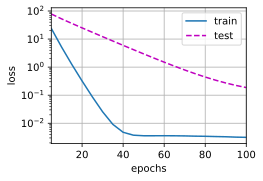

In [30]:
train(lambd=3)

In [44]:
def train_concise(wd):
  net = nn.Sequential(nn.Linear(num_inputs, 1))
  for param in net.parameters():
    param.data.normal_()
  loss = nn.MSELoss()
  num_epochs, lr = 100, 0.003
  trainer = torch.optim.SGD([{"params":net[0].weight,"weight_decay": wd}, {"params":net[0].bias}], lr=lr)
  animator = d2l.Animator(xlabel='epoch',ylabel='loss', legend=['train loss', 'test loss'],xlim=(5, 100), yscale='log')
  for epoch in range(num_epochs):
    for x,y in train_iter:
      trainer.zero_grad()
      l = loss(net(x), y)
      l.backward()
      trainer.step()
    if (epoch+1)%5 == 0:
      animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
  print('L2 norm w:', net[0].weight.norm().item())

L2 norm w: 13.125761985778809


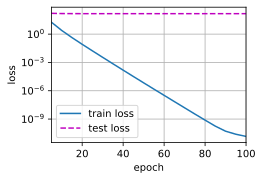

In [45]:
train_concise(0)

L2 norm w: 0.41890132427215576


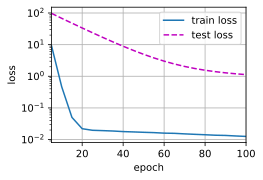

In [46]:
train_concise(3)